# Imports and Data Load

In [1]:
# imports
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import os

In [2]:
pbj_raw = pd.read_csv('raw_data/PBJ_Daily_Nurse_Staffing_Q1_2024.csv' , encoding='ISO-8859-1', dtype={0: 'str'}, low_memory=False)

## PROVNUM or Medicare Provider Number is also known as CMS Certification Number (CCN)

In [3]:
pbj = pbj_raw.copy()
# saving a copy of raw data without touching it further down

# Data Cleaning and Manipulation

In [4]:
pbj.head()

,ï»¿PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,...,0.0,156.34,156.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,...,0.0,147.15,147.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,...,0.0,142.21,142.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pbj.rename(columns = {'ï»¿PROVNUM':'PROVNUM'}, inplace =True) 

In [6]:
pbj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [7]:
pbj.isnull().sum()
# we have no mussing values

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [8]:
pbj[pbj.duplicated() == True]

# we have no duplicate enteries

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr


In [9]:
pbj.columns

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')

In [10]:
pbj['Total_Hours'] = pbj[['Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_RN', 'Hrs_LPNadmin', 'Hrs_LPN', 'Hrs_CNA', 'Hrs_NAtrn', 'Hrs_MedAide']].sum(axis=1)

In [11]:
pbj[[ 'Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_RN', 'Hrs_LPNadmin', 'Hrs_LPN', 'Hrs_CNA', 'Hrs_NAtrn', 'Hrs_MedAide']].head()

,Hrs_RNDON,Hrs_RNadmin,Hrs_RN,Hrs_LPNadmin,Hrs_LPN,Hrs_CNA,Hrs_NAtrn,Hrs_MedAide
0,8.0,8.00,40.07,0.0,18.16,156.34,0.0,0.0
1,8.0,18.24,58.89,0.0,22.96,149.40,0.0,0.0
2,8.0,15.10,55.02,0.0,20.70,147.15,0.0,0.0
3,8.0,14.90,57.13,0.0,12.70,142.21,0.0,0.0
4,8.0,15.47,46.76,0.0,27.44,149.40,0.0,0.0


In [12]:
pbj[['Total_Hours']].head()

,Total_Hours
0,230.57
1,257.49
2,245.97
3,234.94
4,247.07


In [13]:
pbj['Total_Hours_emp'] = pbj[['Hrs_RNDON_emp', 'Hrs_RNadmin_emp', 'Hrs_RN_emp', 'Hrs_LPNadmin_emp', 'Hrs_LPN_emp', 'Hrs_CNA_emp', 'Hrs_NAtrn_emp', 'Hrs_MedAide_emp']].sum(axis=1)

In [14]:
pbj['Total_Hours_ctr'] = pbj[['Hrs_RNDON_ctr', 'Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr', 'Hrs_NAtrn_ctr', 'Hrs_MedAide_ctr']].sum(axis=1)

In [15]:
pbj.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,Total_Hours,Total_Hours_emp,Total_Hours_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.57,230.57,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257.49,257.49,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,245.97,245.97,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.94,234.94,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247.07,247.07,0.0


In [16]:
pbj.STATE.nunique()

52

In [17]:
pbj.STATE.unique()

# 50 states + Distict of Columbia and Puerto Rico

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [18]:
pbj = pbj[(pbj['STATE'] != 'DC') & (pbj['STATE'] != 'PR')]

# Dropping Distict of Columbia and Puerto Rico from Analysis for now - Goal is to focus on 50 states as per problem statement in Google doc

In [19]:
pbj.STATE.nunique()

50

In [20]:
pbj.PROVNUM.nunique()

14604

## Exploring Secondary Table: Provider Information

In [21]:
# Loading Secondary Tables to gather more information on Providers

provider_sep = pd.read_csv('raw_data/NH_ProviderInfo_Sep2024.csv' , encoding='ISO-8859-1', dtype={0: 'str','Telephone Number':'str'}, low_memory=False)
provider_mar= pd.read_csv('raw_data/NH_ProviderInfo_Mar2024.csv' , encoding='ISO-8859-1', dtype={0: 'str','Telephone Number':'str'}, low_memory=False)

# Provider details for certain Providers from Q1-2024 is missing in latest September file, checking Q1 March file for those Providers covers the gap

In [22]:
provider_sep = provider_sep[['CMS Certification Number (CCN)', 'Provider Address', 'ZIP Code', 'Telephone Number','Provider Type', 'Provider Resides in Hospital','Provider Changed Ownership in Last 12 Months','Ownership Type']]
provider_mar = provider_mar[['CMS Certification Number (CCN)', 'Provider Address', 'ZIP Code', 'Telephone Number','Provider Type', 'Provider Resides in Hospital','Provider Changed Ownership in Last 12 Months','Ownership Type']]


In [23]:
provider_sep.rename(columns = {'CMS Certification Number (CCN)':'PROVNUM'}, inplace =True) 
provider_mar.rename(columns = {'CMS Certification Number (CCN)':'PROVNUM'}, inplace =True) 

In [24]:
# capturing all Provider Numbers present in latest file
latest_PROVNUM = provider_sep.PROVNUM.to_list()

In [25]:
# capturing provider numbers present in March file but not in latest September file
provider_mar = provider_mar[~provider_mar['PROVNUM'].isin(latest_PROVNUM)]

In [26]:
# combineing latest file with PROVNUMs only present in March
provider =pd.concat([provider_mar, provider_sep],ignore_index=True)

In [27]:
provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   PROVNUM                                       14900 non-null  object
 1   Provider Address                              14900 non-null  object
 2   ZIP Code                                      14900 non-null  int64 
 3   Telephone Number                              14900 non-null  object
 4   Provider Type                                 14900 non-null  object
 5   Provider Resides in Hospital                  14900 non-null  object
 6   Provider Changed Ownership in Last 12 Months  14900 non-null  object
 7   Ownership Type                                14900 non-null  object
dtypes: int64(1), object(7)
memory usage: 931.4+ KB


In [28]:
pbj.shape

(1328964, 36)

In [29]:
# Joining provider info to PBJ Q1-2024 file
df = pd.merge(pbj, provider, how='left', left_on=['PROVNUM'], right_on=['PROVNUM']) 

In [30]:
df.shape

(1328964, 43)

In [31]:
df.isnull().sum()

PROVNUM                                         0
PROVNAME                                        0
CITY                                            0
STATE                                           0
COUNTY_NAME                                     0
COUNTY_FIPS                                     0
CY_Qtr                                          0
WorkDate                                        0
MDScensus                                       0
Hrs_RNDON                                       0
Hrs_RNDON_emp                                   0
Hrs_RNDON_ctr                                   0
Hrs_RNadmin                                     0
Hrs_RNadmin_emp                                 0
Hrs_RNadmin_ctr                                 0
Hrs_RN                                          0
Hrs_RN_emp                                      0
Hrs_RN_ctr                                      0
Hrs_LPNadmin                                    0
Hrs_LPNadmin_emp                                0


In [32]:
df['PROVNUM'][df['ZIP Code'].isnull()].unique()

array([], dtype=object)

In [33]:
df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Total_Hours,Total_Hours_emp,Total_Hours_ctr,Provider Address,ZIP Code,Telephone Number,Provider Type,Provider Resides in Hospital,Provider Changed Ownership in Last 12 Months,Ownership Type
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,...,230.57,230.57,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,...,257.49,257.49,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,...,245.97,245.97,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,...,234.94,234.94,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,...,247.07,247.07,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation


## Exploring Secondary Table: Ownership

Note Ownership table not used at this time:


After exploration, we noticed information sky rockets as a Provider Number can be linked to multiple Owner Names and Types

For example, we see that Provider Number 745038 is assoiacted with two Owners since 2023-06-06.

Digging deeper into CMS.gov website we notice that there percentages are listed as 'NO PERCENTAGE PROVIDED' and 'NOT APPLICABLE'. There is another provider with Association Date 2022-12-01, with Owenrship Percentage as 'NO PERCENTAGE PROVIDED'

The Goal of exploring Ownership was to find common ownership across providers and note if any patterns jump out to highlight Key Owners for building partnerships.

Given the vaguness of information and to narrow scope of this submission, we are only adding Provider Information as secondary Table. 

Ownership table is not used for recommendations below, but based on further study and data cleaning it might provide value in the future.

In [34]:
# Loading Ownership Table

owner =  pd.read_csv('raw_data/NH_Ownership_Sep2024.csv' , encoding='ISO-8859-1', dtype={0: 'str'}, low_memory=False)

In [35]:
owner.rename(columns = {'CMS Certification Number (CCN)':'PROVNUM'}, inplace =True) 

In [36]:
owner = owner[['PROVNUM', 'Owner Type', 'Owner Name','Association Date']]

In [37]:
owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145367 entries, 0 to 145366
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   PROVNUM           145367 non-null  object
 1   Owner Type        144827 non-null  object
 2   Owner Name        144827 non-null  object
 3   Association Date  144827 non-null  object
dtypes: object(4)
memory usage: 4.4+ MB


In [38]:
# convert Association Date to Date field and catch owner info mased on latest date
owner['Association Date']=owner['Association Date'].str.replace('since ','')

In [39]:
owner[['PROVNUM','Association Date']]

,PROVNUM,Association Date
0,015009,01/25/2012
1,015009,09/01/1969
2,015009,09/07/1969
3,015009,12/26/2019
4,015009,12/26/2019
...,...,...
145362,745040,09/01/2023
145363,745040,06/01/2023
145364,745040,09/01/2023
145365,745040,04/08/2024


In [40]:
owner['Association Date'] = pd.to_datetime(owner['Association Date'], errors='coerce')

In [41]:
owner[['PROVNUM','Association Date']]

,PROVNUM,Association Date
0,015009,2012-01-25
1,015009,1969-09-01
2,015009,1969-09-07
3,015009,2019-12-26
4,015009,2019-12-26
...,...,...
145362,745040,2023-09-01
145363,745040,2023-06-01
145364,745040,2023-09-01
145365,745040,2024-04-08


In [42]:
owner.head()

,PROVNUM,Owner Type,Owner Name,Association Date
0,015009,Individual,"DEARMAN, CAMERON",2012-01-25
1,015009,Individual,"DEARMAN, MARTHA",1969-09-01
2,015009,Individual,"DEARMAN, MARTHA",1969-09-07
3,015009,Individual,"DEARMAN, CAMERON",2019-12-26
4,015009,Individual,"DEARMAN, MARK",2019-12-26


In [43]:
 owner.groupby(['PROVNUM'])['Association Date'].max().reset_index()

,PROVNUM,Association Date
0,015009,2019-12-26
1,015010,2018-11-16
2,015012,2021-12-01
3,015014,2017-05-08
4,015015,2002-09-13
...,...,...
14812,745022,2022-12-30
14813,745038,2023-06-06
14814,745039,2023-02-01
14815,745040,2024-04-08


In [44]:
temp = owner.groupby(['PROVNUM'])['Association Date'].max().reset_index()

In [45]:
owner_latest = pd.merge(temp, owner, how='left', left_on = ['PROVNUM','Association Date'], right_on= ['PROVNUM','Association Date'])

In [46]:
owner_latest

,PROVNUM,Association Date,Owner Type,Owner Name
0,015009,2019-12-26,Individual,"DEARMAN, CAMERON"
1,015009,2019-12-26,Individual,"DEARMAN, MARK"
2,015010,2018-11-16,Individual,"CHAPMAN, ARCHIE"
3,015010,2018-11-16,Organization,"PRIME MANAGEMENT, LLC"
4,015010,2018-11-16,Individual,"CHAPMAN, ARCHIE"
...,...,...,...,...
47596,745039,2023-02-01,Individual,"HAWLEY, GRACEN"
47597,745039,2023-02-01,Individual,"HAWLEY, RUSSELL"
47598,745039,2023-02-01,Individual,"HAWLEY, GRACEN"
47599,745040,2024-04-08,Individual,"ROBINSON, MYRNA"


In [47]:
pbj.shape

(1328964, 36)

In [48]:
df_2 = pd.merge(pbj, owner_latest, how='left', left_on=['PROVNUM'], right_on=['PROVNUM'],) 

In [49]:
df_2.shape
# the number of enteris sky rockets as a Provider Number can be linked to multiple Owner Names and Types

(4280367, 39)

In [50]:
col_to_check = 'Owner Type'
new = df_2.groupby(['PROVNUM'])[col_to_check].nunique()

In [51]:
new.sort_values(ascending=False)

PROVNUM
745038    2
145887    2
365554    2
455968    2
145866    2
         ..
455522    0
455510    0
185384    0
455493    0
056351    0
Name: Owner Type, Length: 14604, dtype: int64

In [52]:
df_2[['PROVNUM', 'Owner Type', 'Owner Name','Association Date']][df_2['PROVNUM'] == '745038'].head()

,PROVNUM,Owner Type,Owner Name,Association Date
4280094,745038,Individual,"DOUGLAS, LLOYD",2023-06-06
4280095,745038,Organization,CONQUEST HEALTHCARE MANAGEMENT LLC,2023-06-06
4280096,745038,Individual,"DOUGLAS, LLOYD",2023-06-06
4280097,745038,Individual,"DOUGLAS, LLOYD",2023-06-06
4280098,745038,Organization,CONQUEST HEALTHCARE MANAGEMENT LLC,2023-06-06


We see that Provider Number 745038 is assoiacted with two Owners since 2023-06-06.

Digging deeper into CMS.gov website we notice that there percentages are listed as 'NO PERCENTAGE PROVIDED' and 'NOT APPLICABLE'. There is another provider with Association Date 2022-12-01, with Owenrship Percentage as 'NO PERCENTAGE PROVIDED'

The Goal of exploring Ownership was to find common ownership across providers and note if there are any patterns jump out to highlight Key Owners.

Given the vaguness of information and to narrow scope of this submission, we are only adding Provider Information as secondary Table. 

Ownership table is not used for further analysis below, but based on further study and data cleaning might provide potential value in future.

# Exploratory Data Analysis

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328964 entries, 0 to 1328963
Data columns (total 43 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   PROVNUM                                       1328964 non-null  object 
 1   PROVNAME                                      1328964 non-null  object 
 2   CITY                                          1328964 non-null  object 
 3   STATE                                         1328964 non-null  object 
 4   COUNTY_NAME                                   1328964 non-null  object 
 5   COUNTY_FIPS                                   1328964 non-null  int64  
 6   CY_Qtr                                        1328964 non-null  object 
 7   WorkDate                                      1328964 non-null  int64  
 8   MDScensus                                     1328964 non-null  int64  
 9   Hrs_RNDON                          

In [54]:
df['WorkDate'] = pd.to_datetime(df['WorkDate'].astype(str), format='%Y%m%d')
df['COUNTY_FIPS'] = df['COUNTY_FIPS'].astype('str')
df['ZIP Code'] = df['ZIP Code'].astype('str')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328964 entries, 0 to 1328963
Data columns (total 43 columns):
 #   Column                                        Non-Null Count    Dtype         
---  ------                                        --------------    -----         
 0   PROVNUM                                       1328964 non-null  object        
 1   PROVNAME                                      1328964 non-null  object        
 2   CITY                                          1328964 non-null  object        
 3   STATE                                         1328964 non-null  object        
 4   COUNTY_NAME                                   1328964 non-null  object        
 5   COUNTY_FIPS                                   1328964 non-null  object        
 6   CY_Qtr                                        1328964 non-null  object        
 7   WorkDate                                      1328964 non-null  datetime64[ns]
 8   MDScensus                                 

In [56]:
df['day_of_week']=df['WorkDate'].dt.day_name()

In [57]:
#conditions
conditions = [
    (df['day_of_week'] == 'Saturday'),
    (df['day_of_week'] == 'Sunday')
    ]
 
#values
values = [1.0,1.0]

# create a new indicator column
df['is_weekend'] = np.select(conditions, values,0)

In [58]:
df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Total_Hours_ctr,Provider Address,ZIP Code,Telephone Number,Provider Type,Provider Resides in Hospital,Provider Changed Ownership in Last 12 Months,Ownership Type,day_of_week,is_weekend
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-01,50,8.0,...,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation,Monday,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-02,49,8.0,...,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation,Tuesday,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-03,49,8.0,...,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation,Wednesday,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-04,50,8.0,...,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation,Thursday,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-05,51,8.0,...,0.0,701 MONROE STREET NW,35653,2563324110,Medicare and Medicaid,N,N,For profit - Corporation,Friday,0.0


At this Point we have clean and ready to plug data with day_of_week, weekend check and Provider Information such as zip code and address included

For building a dashboard I will take this data over the raw data and plug it into a data visualization tool such as Tableau or Pwer BI

Here for the sake of continuity I am moving ahead in Jupyter Notebook. I will be presenting findings in pdf format and if time allows look to build a basic forecast model so that we can predict number of contract hours/ market for next week 

In [59]:
# save the clean data as a csv file
datapath = './clean_Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_pbj_data = os.path.join(datapath, 'pbj_clean.csv')
if not os.path.exists(datapath_pbj_data):
    df.to_csv(datapath_pbj_data, index=False)

# Recommendation 1 

Focusing on Contract Roles, 3 roles RN, LPN, and CNA make up 97% of total contract hours and can be considered key line of businesses.



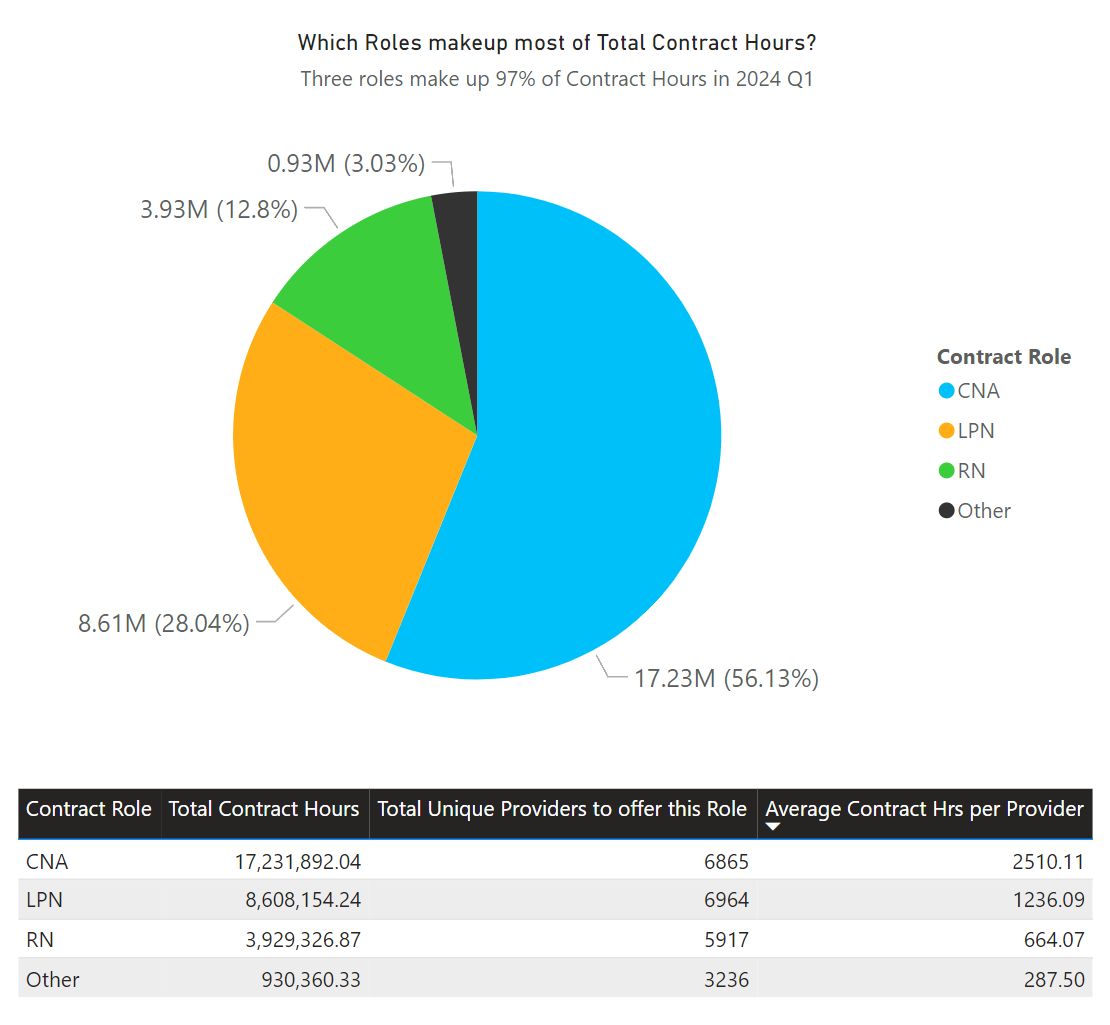

In [60]:
df.rename(columns={'Total_Hours_ctr':'Total_contract_hours','Hrs_RN_ctr':'RN_contract_hours', 'Hrs_LPN_ctr':'LPN_contract_hours', 'Hrs_CNA_ctr':'CNA_contract_hours'}, inplace=True)

In [61]:
other_contracts = ['Hrs_RNDON_ctr', 'Hrs_RNadmin_ctr', 'Hrs_LPNadmin_ctr', 'Hrs_NAtrn_ctr', 'Hrs_MedAide_ctr']

df['Other_contract_hours']=df[other_contracts].sum(axis=1)

In [62]:
# Example of cases with contract hours outside of 3 main roles
df[df['Other_contract_hours']>0].head().T

,1117,1120,1121,1122,1123
PROVNUM,015032,015032,015032,015032,015032
PROVNAME,DIVERSICARE OF FOLEY,DIVERSICARE OF FOLEY,DIVERSICARE OF FOLEY,DIVERSICARE OF FOLEY,DIVERSICARE OF FOLEY
CITY,FOLEY,FOLEY,FOLEY,FOLEY,FOLEY
STATE,AL,AL,AL,AL,AL
COUNTY_NAME,Baldwin,Baldwin,Baldwin,Baldwin,Baldwin
COUNTY_FIPS,3,3,3,3,3
CY_Qtr,2024Q1,2024Q1,2024Q1,2024Q1,2024Q1
WorkDate,2024-01-26 00:00:00,2024-01-29 00:00:00,2024-01-30 00:00:00,2024-01-31 00:00:00,2024-02-01 00:00:00
MDScensus,129,130,132,132,128
Hrs_RNDON,10.25,0.0,0.0,0.0,0.0


In [63]:
df_lob = df[['PROVNUM','RN_contract_hours','LPN_contract_hours', 'CNA_contract_hours','Other_contract_hours']]

In [64]:
# [df_lob.RN_contract_hours.sum(),df_lob.LPN_contract_hours.sum(),df_lob.CNA_contract_hours.sum(),df_lob.Other_contract_hours.sum()]

In [65]:
# [df_lob[df_lob['RN_contract_hours']>0].PROVNUM.nunique(),df_lob[df_lob['LPN_contract_hours']>0].PROVNUM.nunique(),df_lob[df_lob['CNA_contract_hours']>0].PROVNUM.nunique(),df_lob[df_lob['Other_contract_hours']>0].PROVNUM.nunique()]

In [66]:
df_lob_summary = pd.DataFrame({'Contract Role' : ['RN','LPN','CNA','Other']
                    ,'Total Hours':[df_lob.RN_contract_hours.sum(),df_lob.LPN_contract_hours.sum(),df_lob.CNA_contract_hours.sum(),df_lob.Other_contract_hours.sum()]
                    ,'Total Providers':[df_lob[df_lob['RN_contract_hours']>0].PROVNUM.nunique(),df_lob[df_lob['LPN_contract_hours']>0].PROVNUM.nunique(),df_lob[df_lob['CNA_contract_hours']>0].PROVNUM.nunique(),df_lob[df_lob['Other_contract_hours']>0].PROVNUM.nunique()]}
                   )
df_lob_summary['Average Hrs per Provider'] = df_lob_summary['Total Hours']/df_lob_summary['Total Providers']
df_lob_summary = df_lob_summary.sort_values(by='Average Hrs per Provider', ascending=False)


df_lob_summary

,Contract Role,Total Hours,Total Providers,Average Hrs per Provider
2,CNA,17231892.04,6865,2510.108090
1,LPN,8608154.24,6964,1236.093372
0,RN,3929326.87,5917,664.074171
3,Other,930360.33,3236,287.503192


In [67]:
# df_lob_summary['label'] = ((df_lob_summary['Total Hours']/1000000).round(2).astype(str))+"M ("+(((df_lob_summary['Total Hours']/df_lob_summary['Total Hours'].sum())*100).round(2).astype(str))+'%)'


In [68]:
# save the clean data as a csv file
datapath = './clean_Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_pbj_data = os.path.join(datapath, 'df_lob_summary.csv')
if not os.path.exists(datapath_pbj_data):
    df_lob_summary.to_csv(datapath_pbj_data, index=False)

# Recommendation 2

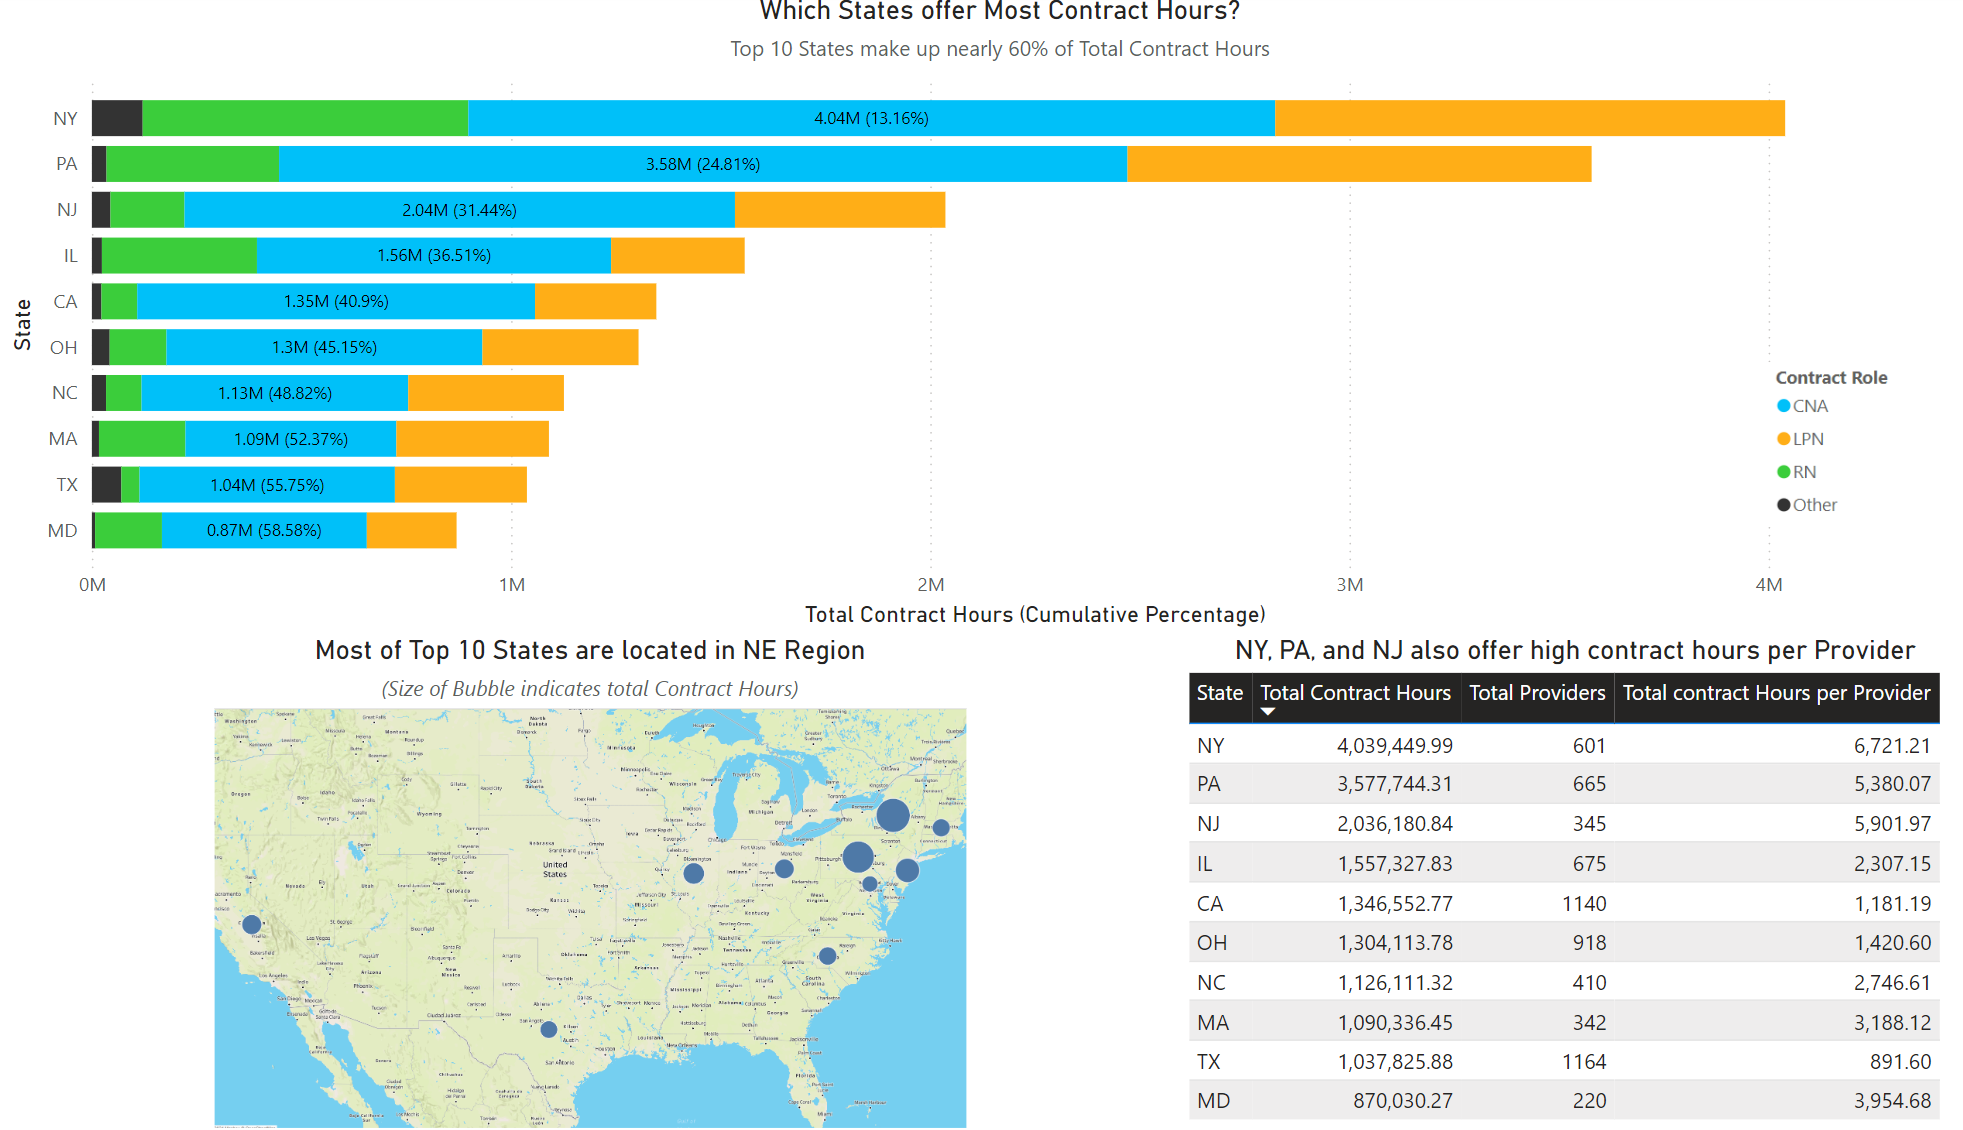

In [69]:
# df.columns.to_list()

In [70]:
df_state = df[['PROVNUM','STATE','COUNTY_NAME','RN_contract_hours','LPN_contract_hours', 'CNA_contract_hours','Other_contract_hours','Total_contract_hours','ZIP Code']]

In [71]:
df_state

,PROVNUM,STATE,COUNTY_NAME,RN_contract_hours,LPN_contract_hours,CNA_contract_hours,Other_contract_hours,Total_contract_hours,ZIP Code
0,015009,AL,Franklin,0.0,0.0,0.0,0.0,0.0,35653
1,015009,AL,Franklin,0.0,0.0,0.0,0.0,0.0,35653
2,015009,AL,Franklin,0.0,0.0,0.0,0.0,0.0,35653
3,015009,AL,Franklin,0.0,0.0,0.0,0.0,0.0,35653
4,015009,AL,Franklin,0.0,0.0,0.0,0.0,0.0,35653
...,...,...,...,...,...,...,...,...,...
1328959,745038,TX,El Paso,0.0,0.0,0.0,0.0,0.0,79938
1328960,745038,TX,El Paso,0.0,0.0,0.0,0.0,0.0,79938
1328961,745038,TX,El Paso,0.0,0.0,0.0,0.0,0.0,79938
1328962,745038,TX,El Paso,0.0,0.0,0.0,0.0,0.0,79938


In [72]:
df_state['STATE'].nunique()

50

In [73]:
df_state['COUNTY_NAME'].nunique()

1667

In [74]:
df_state['ZIP Code'].nunique()

8871

In [75]:
df_state_summary = df_state.groupby('STATE')[['RN_contract_hours','LPN_contract_hours', 'CNA_contract_hours','Other_contract_hours','Total_contract_hours']].sum()
df_state_summary = df_state_summary.sort_values(by='Total_contract_hours', ascending=False).reset_index()
df_state_summary['Total Hours Percentage'] = ((df_state_summary['Total_contract_hours']/df_state_summary['Total_contract_hours'].sum())*100).round(2)



df_state_summary.head()


,STATE,RN_contract_hours,LPN_contract_hours,CNA_contract_hours,Other_contract_hours,Total_contract_hours,Total Hours Percentage
0,NY,776877.65,1216464.72,1924905.03,121202.59,4039449.99,13.16
1,PA,411631.05,1107096.05,2024098.00,34919.21,3577744.31,11.65
2,NJ,176665.18,502039.89,1313177.45,44298.32,2036180.84,6.63
3,IL,369883.16,318700.45,844819.19,23925.03,1557327.83,5.07
4,CA,85274.23,289389.01,949042.36,22847.17,1346552.77,4.39


In [76]:
# df_state.groupby('STATE').PROVNUM.nunique()

In [77]:
#  pd.DataFrame(df_state.groupby('STATE').PROVNUM.nunique())
# df_state_summary['Total Unique Providers to offer RN role']=df_state[df_state['RN_contract_hours']>0].groupby('STATE').PROVNUM.nunique()
# df_state_summary['Total Unique Providers to offer LPN role']=df_state[df_state['LPN_contract_hours']>0].groupby('STATE').PROVNUM.nunique()
# df_state_summary['Total Unique Providers to offer CNA role']=df_state[df_state['CNA_contract_hours']>0].groupby('STATE').PROVNUM.nunique()
# df_state_summary['Total Unique Providers to offer Other role']=df_state[df_state['Other_contract_hours']>0].groupby('STATE').PROVNUM.nunique()

In [78]:
df_state_providers  = pd.DataFrame({'Total_Providers':df_state.groupby('STATE').PROVNUM.nunique()
             , 'Total Unique Providers to offer RN role': df_state[df_state['RN_contract_hours']>0].groupby('STATE').PROVNUM.nunique()
             , 'Total Unique Providers to offer LPN role': df_state[df_state['LPN_contract_hours']>0].groupby('STATE').PROVNUM.nunique()
              , 'Total Unique Providers to offer CNA role': df_state[df_state['CNA_contract_hours']>0].groupby('STATE').PROVNUM.nunique()
              , 'Total Unique Providers to offer Other role': df_state[df_state['Other_contract_hours']>0].groupby('STATE').PROVNUM.nunique()
             }).reset_index()

df_state_providers.head()

,STATE,Total_Providers,Total Unique Providers to offer RN role,Total Unique Providers to offer LPN role,Total Unique Providers to offer CNA role,Total Unique Providers to offer Other role
0,AK,15,9,6,9,1
1,AL,223,29,41,31,9
2,AR,217,18,41,31,129
3,AZ,139,67,74,78,9
4,CA,1140,264,432,483,123


In [79]:
# df_state_summary = df_state_summary.DataFrame.insert(-1,'Total Unique Providers',[df_state.groupby('STATE').PROVNUM.nunique().to_list()])

In [80]:
df_state_summary = df_state_summary.merge(df_state_providers, left_on='STATE',right_on='STATE')

In [81]:
df_state_summary.head()

,STATE,RN_contract_hours,LPN_contract_hours,CNA_contract_hours,Other_contract_hours,Total_contract_hours,Total Hours Percentage,Total_Providers,Total Unique Providers to offer RN role,Total Unique Providers to offer LPN role,Total Unique Providers to offer CNA role,Total Unique Providers to offer Other role
0,NY,776877.65,1216464.72,1924905.03,121202.59,4039449.99,13.16,601,343,411,374,162
1,PA,411631.05,1107096.05,2024098.00,34919.21,3577744.31,11.65,665,434,499,479,113
2,NJ,176665.18,502039.89,1313177.45,44298.32,2036180.84,6.63,345,208,248,250,105
3,IL,369883.16,318700.45,844819.19,23925.03,1557327.83,5.07,675,398,369,374,117
4,CA,85274.23,289389.01,949042.36,22847.17,1346552.77,4.39,1140,264,432,483,123


In [82]:
df_lob_summary['label'] = ((df_lob_summary['Total Hours']/1000000).round(2).astype(str))+"M ("+(((df_lob_summary['Total Hours']/df_lob_summary['Total Hours'].sum())*100).round(2).astype(str))+'%)'


In [83]:
df_state_summary['label'] = ((df_state_summary['Total_contract_hours']/1000000).round(2).astype(str))+"M ("+(df_state_summary['Total Hours Percentage'].cumsum().round(2).astype(str))+'%)'


In [84]:
# save the clean data as a csv file
datapath = './clean_Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_pbj_data = os.path.join(datapath, 'df_state_summary.csv')
if not os.path.exists(datapath_pbj_data):
    df_state_summary.to_csv(datapath_pbj_data, index=False)

In [85]:
# df_state_summary['Total Hours Percentage'].cumsum().round(2).astype(str)

# Recommendation 3

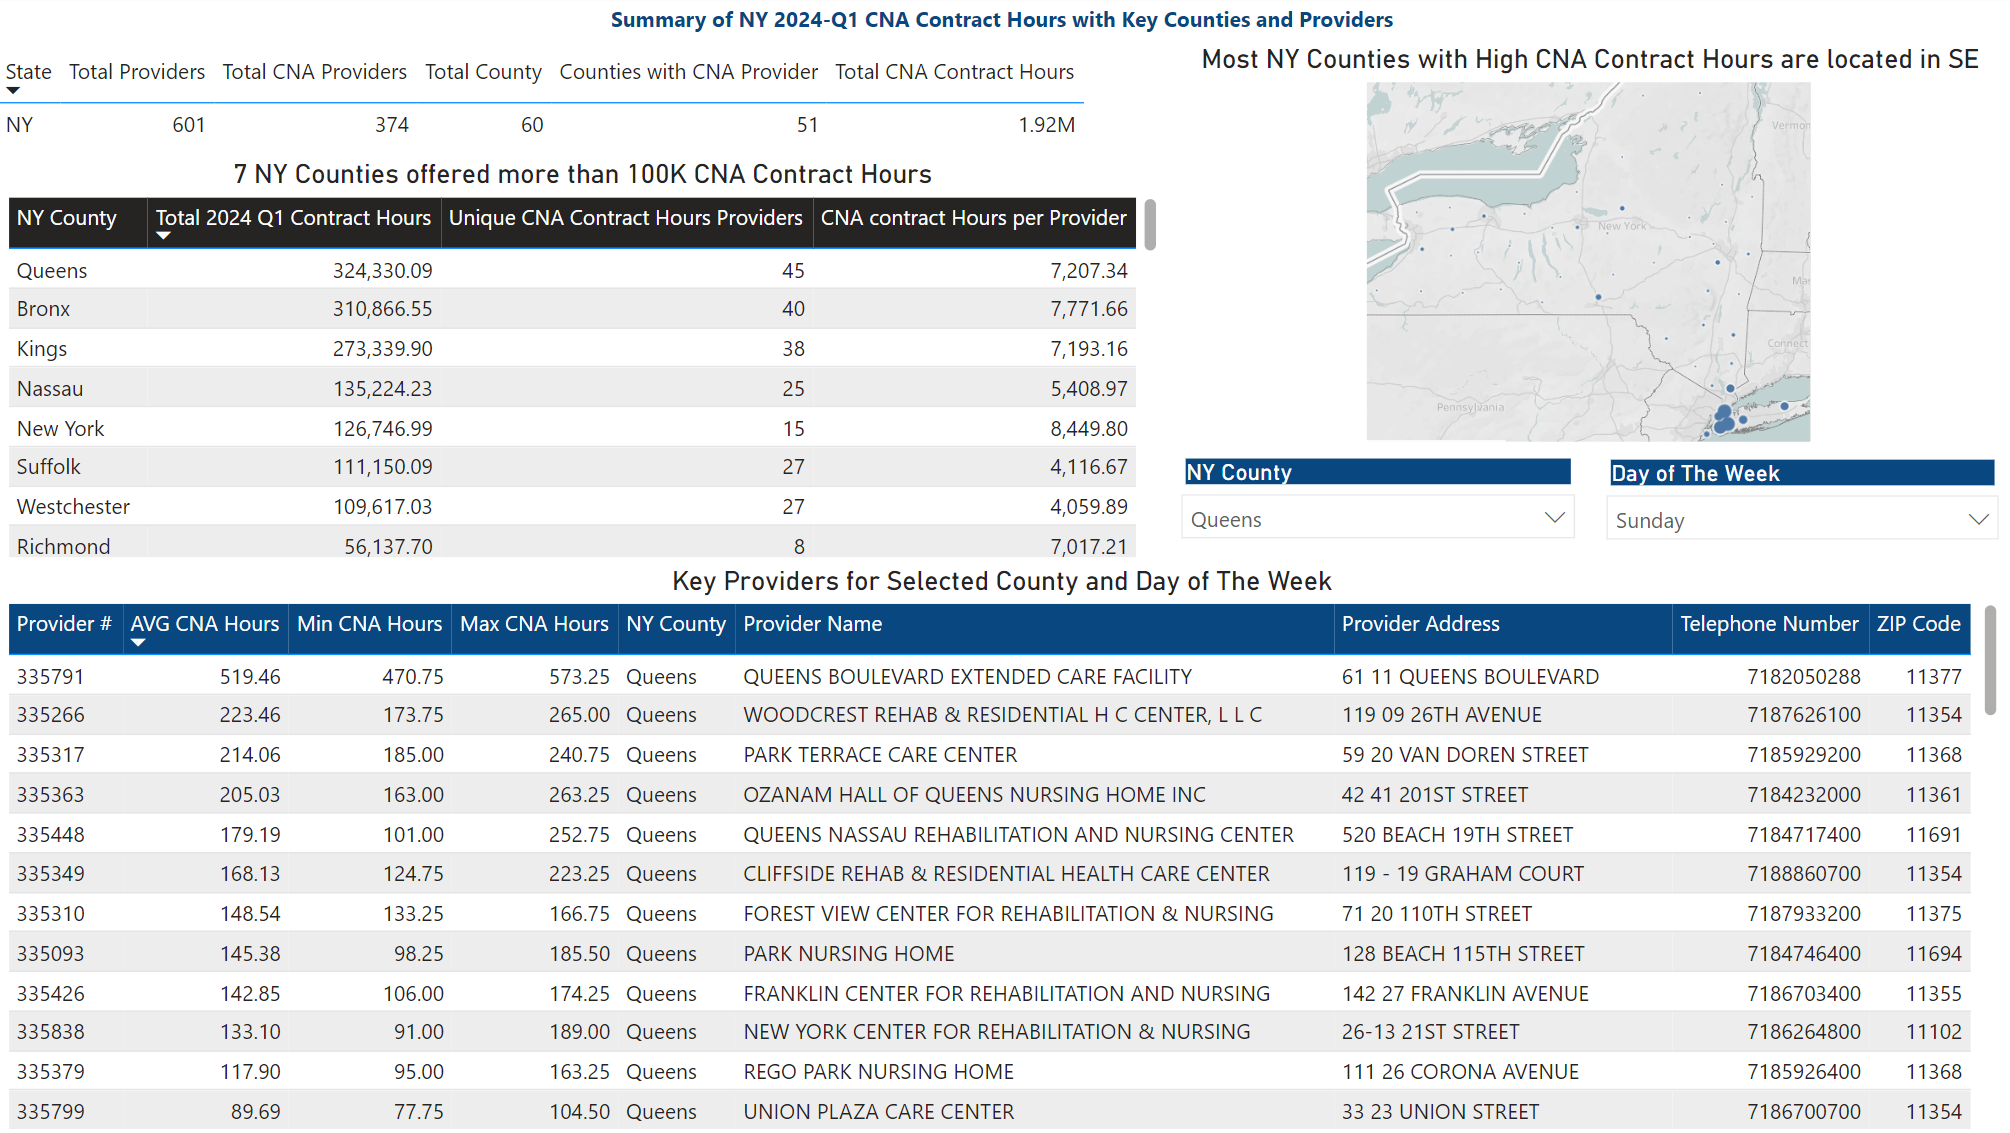

In [86]:
df_ny = df[df['STATE'] == 'NY']

In [87]:
df_ny.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Provider Address,ZIP Code,Telephone Number,Provider Type,Provider Resides in Hospital,Provider Changed Ownership in Last 12 Months,Ownership Type,day_of_week,is_weekend,Other_contract_hours
739375,335003,THE EMERALD PEEK REHABILITATION AND NURSING CE...,PEEKSKILL,NY,Westchester,119,2024Q1,2024-01-01,80,7.13,...,2000 EAST MAIN STREET,10566,9147378400,Medicare and Medicaid,N,N,For profit - Corporation,Monday,0.0,0.0
739376,335003,THE EMERALD PEEK REHABILITATION AND NURSING CE...,PEEKSKILL,NY,Westchester,119,2024Q1,2024-01-02,79,8.00,...,2000 EAST MAIN STREET,10566,9147378400,Medicare and Medicaid,N,N,For profit - Corporation,Tuesday,0.0,0.0
739377,335003,THE EMERALD PEEK REHABILITATION AND NURSING CE...,PEEKSKILL,NY,Westchester,119,2024Q1,2024-01-03,81,8.00,...,2000 EAST MAIN STREET,10566,9147378400,Medicare and Medicaid,N,N,For profit - Corporation,Wednesday,0.0,0.0
739378,335003,THE EMERALD PEEK REHABILITATION AND NURSING CE...,PEEKSKILL,NY,Westchester,119,2024Q1,2024-01-04,80,8.00,...,2000 EAST MAIN STREET,10566,9147378400,Medicare and Medicaid,N,N,For profit - Corporation,Thursday,0.0,0.0
739379,335003,THE EMERALD PEEK REHABILITATION AND NURSING CE...,PEEKSKILL,NY,Westchester,119,2024Q1,2024-01-05,80,8.00,...,2000 EAST MAIN STREET,10566,9147378400,Medicare and Medicaid,N,N,For profit - Corporation,Friday,0.0,0.0


In [88]:
[df_ny['RN_contract_hours'].sum(), df_ny['CNA_contract_hours'].sum(), df_ny['LPN_contract_hours'].sum()]

[776877.6499999999, 1924905.03, 1216464.7200000002]

In [89]:
df_ny_summary = df_state_summary[df_state_summary['STATE'] == 'NY']
df_ny_summary = df_ny_summary.assign(Total_Counties=df_state[df_state['STATE'] == 'NY']['COUNTY_NAME'].nunique())
df_ny_summary

,STATE,RN_contract_hours,LPN_contract_hours,CNA_contract_hours,Other_contract_hours,Total_contract_hours,Total Hours Percentage,Total_Providers,Total Unique Providers to offer RN role,Total Unique Providers to offer LPN role,Total Unique Providers to offer CNA role,Total Unique Providers to offer Other role,label,Total_Counties
0,NY,776877.65,1216464.72,1924905.03,121202.59,4039449.99,13.16,601,343,411,374,162,4.04M (13.16%),60


In [90]:
# save the clean data as a csv file
datapath = './clean_Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_pbj_data = os.path.join(datapath, 'df_ny_summary.csv')
if not os.path.exists(datapath_pbj_data):
    df_ny_summary.to_csv(datapath_pbj_data, index=False)

In [91]:
df_ny_cna_providers = df_ny[['PROVNUM','PROVNAME','Provider Address','Telephone Number','Provider Resides in Hospital','Provider Type','COUNTY_NAME','ZIP Code']]

In [92]:
df_ny_cna_providers = df_ny_cna_providers.drop_duplicates()
df_ny_cna_providers.head()

,PROVNUM,PROVNAME,Provider Address,Telephone Number,Provider Resides in Hospital,Provider Type,COUNTY_NAME,ZIP Code
739375,335003,THE EMERALD PEEK REHABILITATION AND NURSING CE...,2000 EAST MAIN STREET,9147378400,N,Medicare and Medicaid,Westchester,10566
739466,335004,AUBURN REHABILITATION & NURSING CENTER,85 THORNTON AVENUE,3152537351,N,Medicare and Medicaid,Cayuga,13021
739557,335005,BRIARCLIFF MANOR CENTER FOR REHAB AND NURSING ...,620 SLEEPY HOLLOW ROAD,9149415100,N,Medicare and Medicaid,Westchester,10510
739648,335006,KATHERINE LUTHER RESIDENTIAL HLTH CARE & REHAB,110 UTICA ROAD,3158535515,N,Medicare and Medicaid,Oneida,13323
739739,335008,ST JOHNS HEALTH CARE CORPORATION,150 HIGHLAND AVENUE,5852715413,N,Medicare and Medicaid,Monroe,14620


In [93]:
df_ny_cna_prov_hours = df_ny.groupby(['PROVNUM','day_of_week'],as_index=False).agg({'CNA_contract_hours':['mean','min','max']}).reset_index()


df_ny_cna_prov_hours .columns = df_ny_cna_prov_hours .columns.to_flat_index()
df_ny_cna_prov_hours .columns = ['_'.join(col) for col in df_ny_cna_prov_hours .columns]

df_ny_cna_prov_hours.drop('index_',axis=1, inplace=True)
df_ny_cna_prov_hours.rename(columns={'PROVNUM_':'PROVNUM', 'day_of_week_':'day_of_week'}, inplace =True)

df_ny_cna_prov_hours = df_ny_cna_prov_hours.sort_values(by='CNA_contract_hours_mean', ascending=False)


df_ny_cna_prov_hours.head()

,PROVNUM,day_of_week,CNA_contract_hours_mean,CNA_contract_hours_min,CNA_contract_hours_max
340,335100,Thursday,619.702308,547.97,694.30
3721,335791,Thursday,587.346154,486.75,666.25
342,335100,Wednesday,586.702308,490.38,689.18
336,335100,Friday,578.220000,492.50,642.99
3719,335791,Saturday,572.942308,486.00,638.75


In [94]:
# df_ny_zero_cna_hours = df_ny.groupby(['PROVNUM'])['CNA_contract_hours'].sum().reset_index()
# df_ny_zero_cna_hours = df_ny_zero_cna_hours[df_ny_zero_cna_hours.PROVNUM == 0]
# df_ny_zero_cna_hours

In [95]:
# save the clean data as a csv file
datapath = './clean_Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_pbj_data = os.path.join(datapath, 'df_ny_cna_providers.csv')
if not os.path.exists(datapath_pbj_data):
    df_ny_cna_providers.to_csv(datapath_pbj_data, index=False)

In [96]:
df_ny_cna_providers[df_ny_cna_providers['Telephone Number'] == '9142946300']

,PROVNUM,PROVNAME,Provider Address,Telephone Number,Provider Resides in Hospital,Provider Type,COUNTY_NAME,ZIP Code
793975,33A246,ELIZABETH SETON CHILDREN'S CENTER,300 CORPORATE BLVD SOUTH,9142946300,N,Medicaid,Westchester,10701


In [97]:
# save the clean data as a csv file
datapath = './clean_Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_pbj_data = os.path.join(datapath, 'df_ny_cna_prov_hours.csv')
if not os.path.exists(datapath_pbj_data):
    df_ny_cna_prov_hours.to_csv(datapath_pbj_data, index=False)

In [98]:
# # save the clean data as a csv file
# datapath = './clean_Data'
# if not os.path.exists(datapath):
#     os.mkdir(datapath)
# datapath_pbj_data = os.path.join(datapath, 'df_ny_prov_hours.csv')
# if not os.path.exists(datapath_pbj_data):
#     df_ny_prov_hours.to_csv(datapath_pbj_data, index=False)

In [99]:
df_ny.COUNTY_NAME.nunique()

60

In [100]:
df_ny_county_prov = df_ny[df_ny['CNA_contract_hours']>0].groupby('COUNTY_NAME').PROVNUM.nunique().reset_index()
df_ny_county_prov = df_ny_county_prov.sort_values(by='PROVNUM', ascending=False)


df_ny_county_prov.head() 

,COUNTY_NAME,PROVNUM
33,Queens,45
2,Bronx,40
16,Kings,38
48,Westchester,27
41,Suffolk,27


In [101]:
df_ny_county_prov.nunique()

COUNTY_NAME    51
PROVNUM        16
dtype: int64

In [102]:
df_ny_county_hours = df_ny[df_ny['CNA_contract_hours']>0].groupby('COUNTY_NAME',as_index=False).agg({'CNA_contract_hours':['sum','mean','min','max'],'PROVNUM':'nunique'}).reset_index()


df_ny_county_hours .columns = df_ny_county_hours .columns.to_flat_index()
df_ny_county_hours .columns = ['_'.join(col) for col in df_ny_county_hours .columns]

df_ny_county_hours.drop('index_',axis=1, inplace=True)
df_ny_county_hours.rename(columns={'COUNTY_NAME_':'COUNTY_NAME'}, inplace =True)

df_ny_county_hours = df_ny_county_hours.sort_values(by='CNA_contract_hours_sum', ascending=False)


df_ny_county_hours.head()

,COUNTY_NAME,CNA_contract_hours_sum,CNA_contract_hours_mean,CNA_contract_hours_min,CNA_contract_hours_max,PROVNUM_nunique
33,Queens,324330.09,91.334861,0.25,666.25,45
2,Bronx,310866.55,95.887276,0.95,474.75,40
16,Kings,273339.90,85.632801,0.75,483.70,38
22,Nassau,135224.23,73.015243,0.25,270.25,25
23,New York,126746.99,104.576724,0.35,694.30,15


In [103]:
df_ny_summary = df_ny_summary.assign(Total_Counties=df_state[df_state['STATE'] == 'NY']['COUNTY_NAME'].nunique())
df_ny_county_hours = df_ny_county_hours.assign(CNA_contract_hours_per_provider=df_ny_county_hours['CNA_contract_hours_sum']/df_ny_county_hours['PROVNUM_nunique'])

In [104]:
# df_ny_county_hours

In [105]:
# df_ny_county_hours.nunique()

In [106]:
# save the clean data as a csv file
datapath = './clean_Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_pbj_data = os.path.join(datapath, 'df_ny_county_hours.csv')
if not os.path.exists(datapath_pbj_data):
    df_ny_county_hours.to_csv(datapath_pbj_data, index=False)

In [107]:
df.columns

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'RN_contract_hours', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'LPN_contract_hours', 'Hrs_CNA', 'Hrs_CNA_emp', 'CNA_contract_hours',
       'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide',
       'Hrs_MedAide_emp', 'Hrs_MedAide_ctr', 'Total_Hours', 'Total_Hours_emp',
       'Total_contract_hours', 'Provider Address', 'ZIP Code',
       'Telephone Number', 'Provider Type', 'Provider Resides in Hospital',
       'Provider Changed Ownership in Last 12 Months', 'Ownership Type',
       'day_of_week', 'is_weekend', 'Other_contract_hours'],
      dtype='object')

# Bonus Recommendation

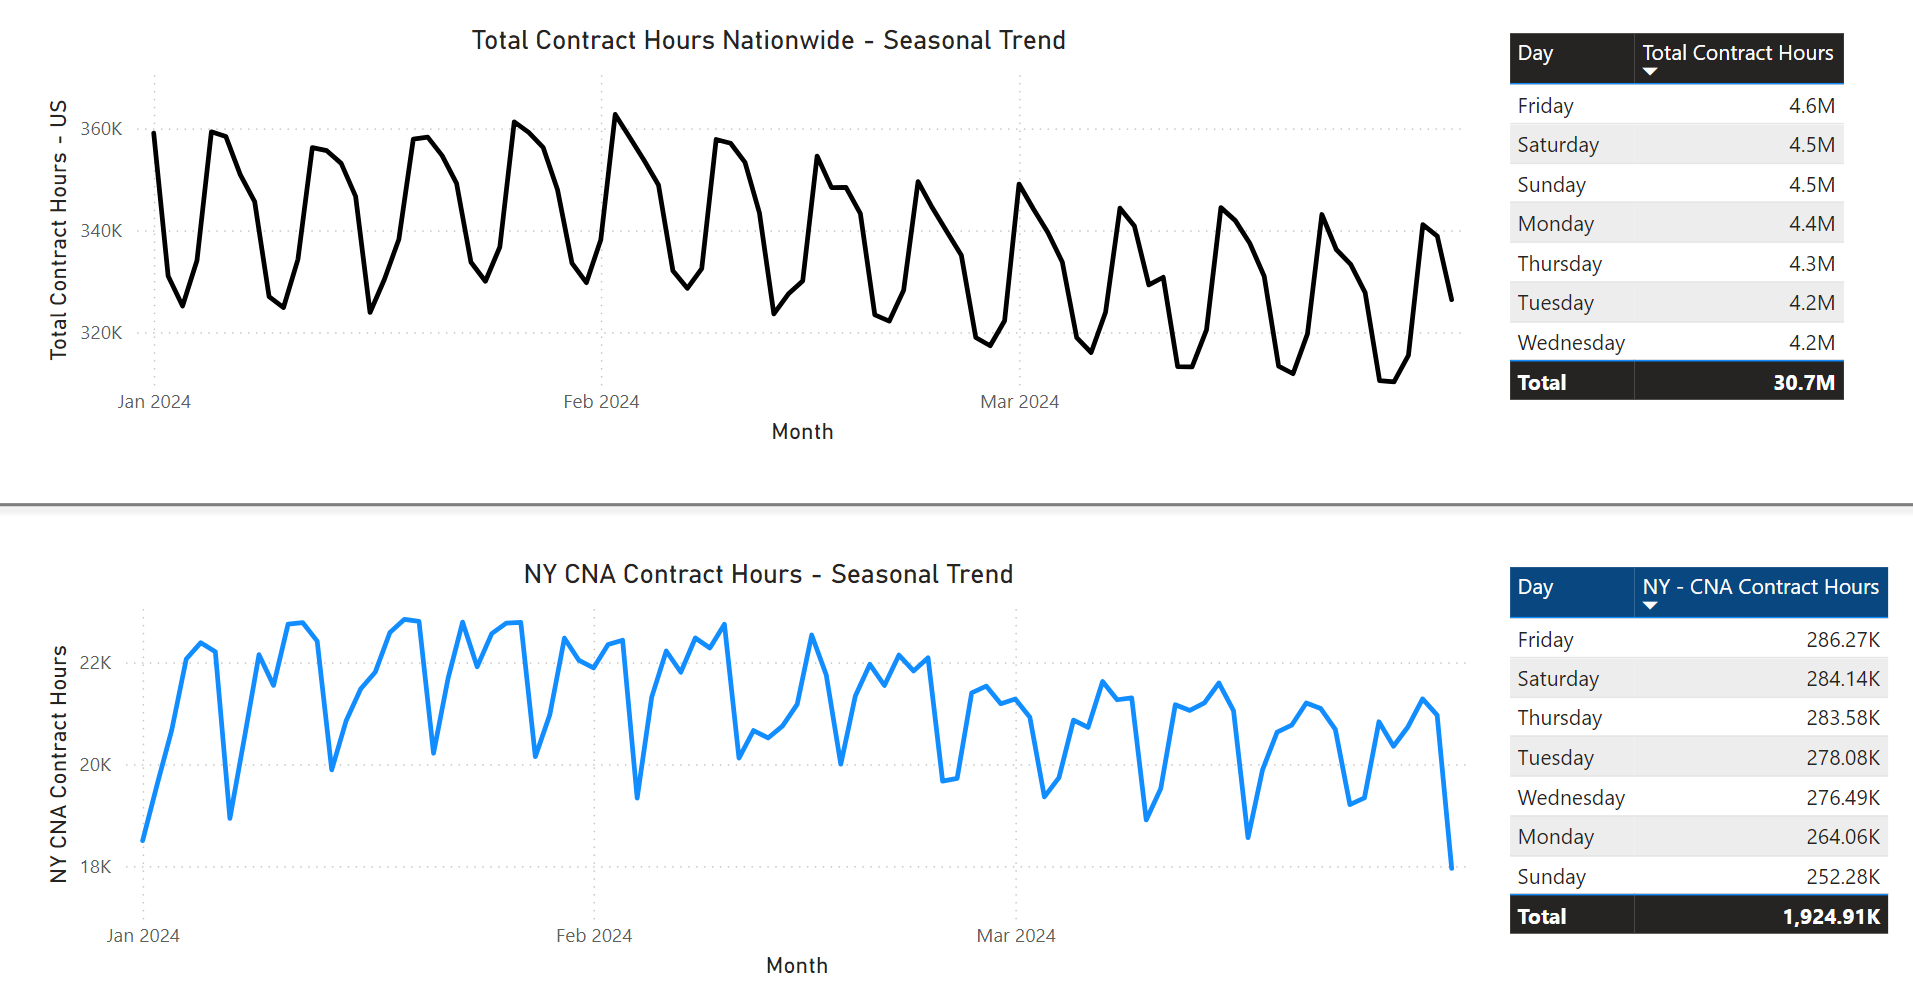

In [108]:
time_series_overall = df[['WorkDate', 'day_of_week' ,'Total_contract_hours']]

In [109]:
time_series_ny_cna= df[['WorkDate', 'day_of_week','CNA_contract_hours']][df['STATE']=='NY']

In [110]:
# save the clean data as a csv file
datapath = './clean_Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_pbj_data = os.path.join(datapath, 'time_series_overall .csv')
if not os.path.exists(datapath_pbj_data):
    time_series_overall .to_csv(datapath_pbj_data, index=False)

In [111]:
# save the clean data as a csv file
datapath = './clean_Data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_pbj_data = os.path.join(datapath, 'time_series_ny_cna.csv')
if not os.path.exists(datapath_pbj_data):
    time_series_ny_cna.to_csv(datapath_pbj_data, index=False)